In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

In [6]:
discrete = [f for f in df.columns if df[f].nunique()<20 and f!='Outcome']
discrete

['Pregnancies']

In [7]:
np.sort(df.Pregnancies.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])

In [8]:
df[df.Pregnancies>10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,11,143,94,33,146,36.6,0.254,51,1
28,13,145,82,19,110,22.2,0.245,57,0
36,11,138,76,0,0,33.2,0.420,35,0
72,13,126,90,0,0,43.4,0.583,42,1
86,13,106,72,54,0,36.6,0.178,45,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
193,11,135,0,0,0,52.3,0.578,40,1
215,12,151,70,40,271,41.8,0.742,38,1
254,12,92,62,7,258,27.6,0.926,44,1


## Number of Pregnancies vs Outcome 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

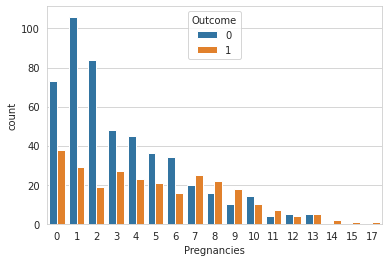

In [9]:
sns.countplot(df["Pregnancies"], hue = df["Outcome"])

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

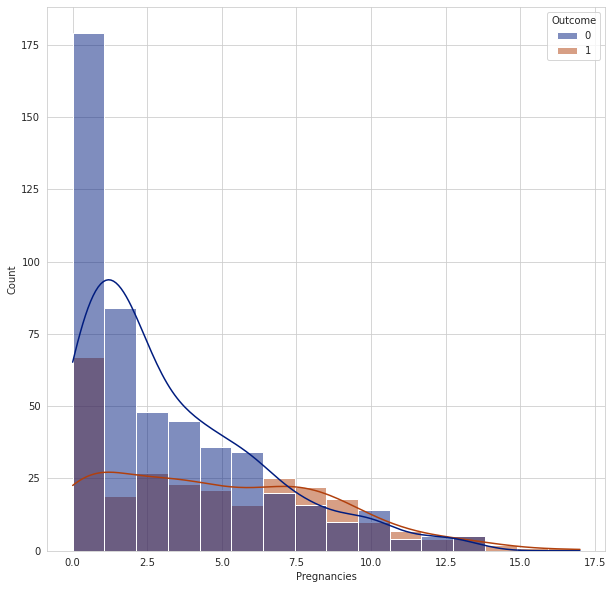

In [10]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Pregnancies", hue = "Outcome",data=df, kde = True,palette="dark")

## Glucose vs Outcome 

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

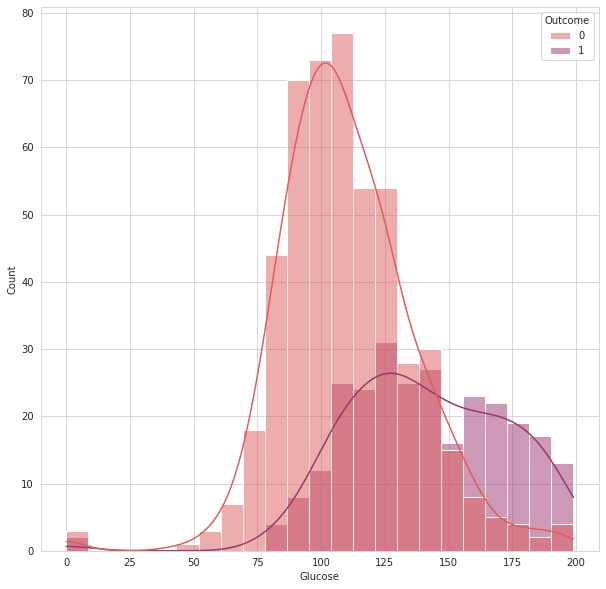

In [11]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Glucose", hue = "Outcome",data=df, kde = True,palette = "flare")

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

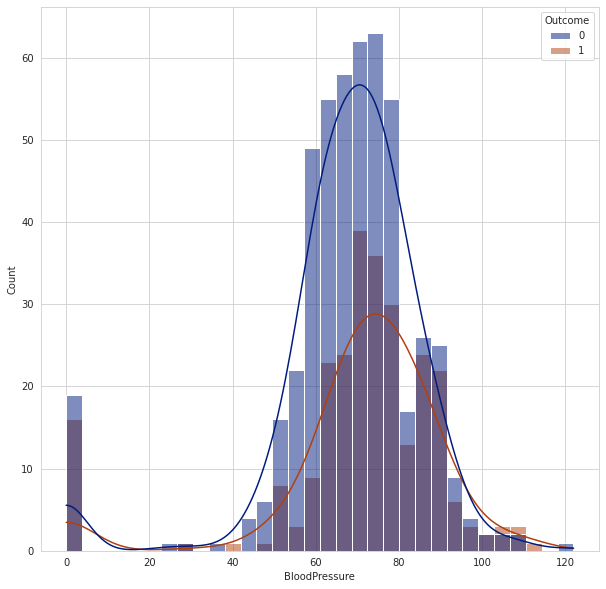

In [12]:
plt.figure(figsize = (10,10))
sns.histplot(x ="BloodPressure", hue = "Outcome",data=df, kde = True,palette = "dark")

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

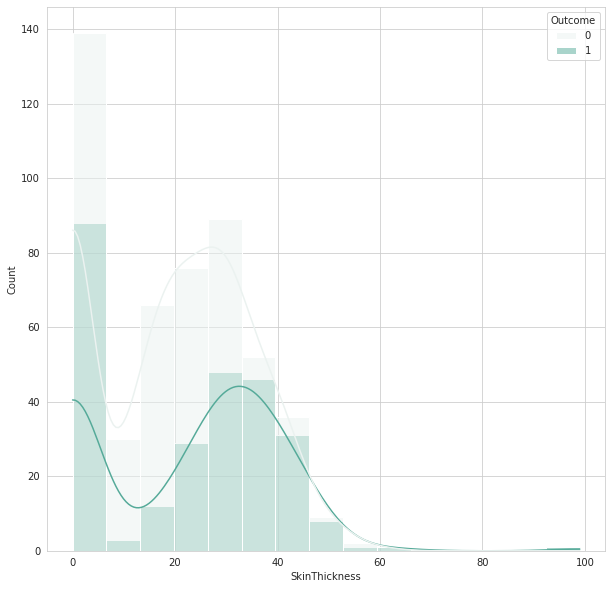

In [13]:
plt.figure(figsize = (10,10))
sns.histplot(x ="SkinThickness", hue = "Outcome",data=df, kde = True,palette="light:#5A9")

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

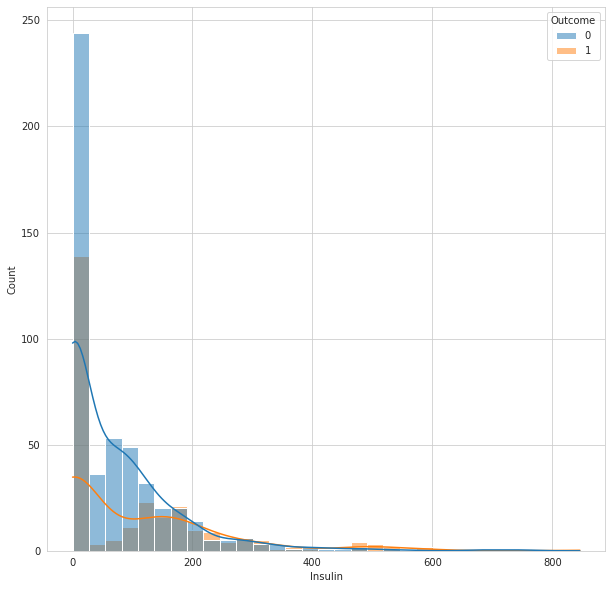

In [14]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Insulin", hue = "Outcome",data=df, kde = True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

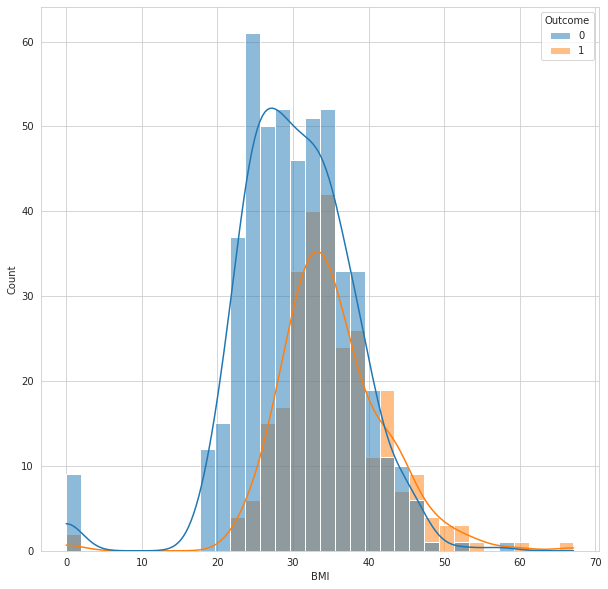

In [15]:
plt.figure(figsize = (10,10))
sns.histplot(x ="BMI", hue = "Outcome",data=df, kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

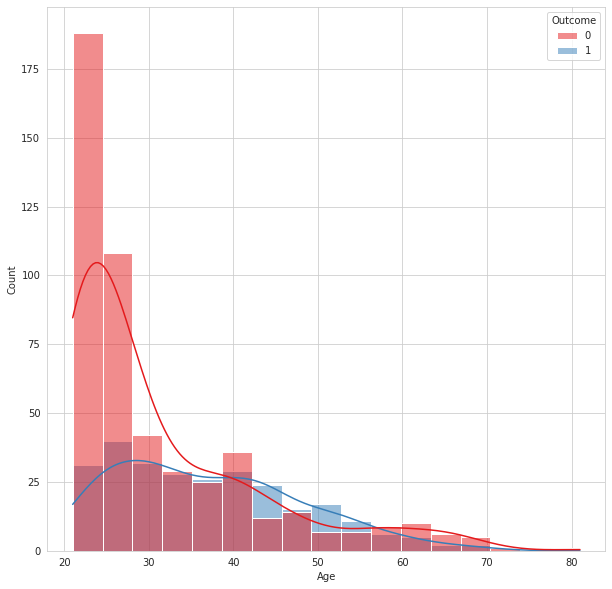

In [16]:
plt.figure(figsize = (10,10))
sns.histplot(x ="Age", hue = "Outcome",data=df, kde = True,palette="Set1")

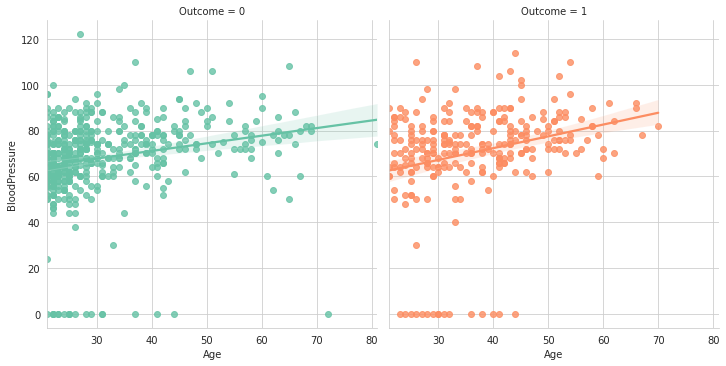

In [17]:
sns.lmplot(data=df, x="Age", y="BloodPressure",hue = "Outcome",palette="Set2",col = "Outcome")

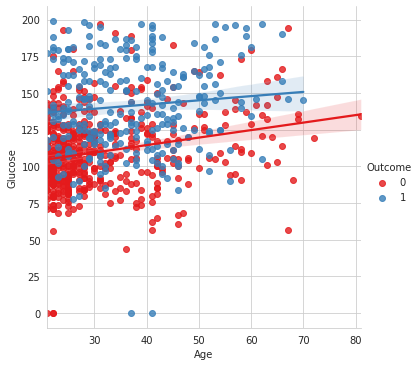

In [18]:
sns.lmplot(data=df, x="Age", y="Glucose",hue = "Outcome",palette="Set1")

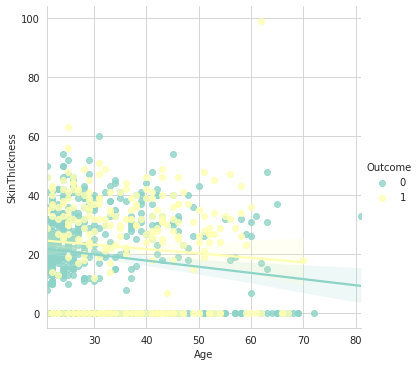

In [19]:
sns.lmplot(data=df, x="Age", y="SkinThickness",hue = "Outcome",palette="Set3")

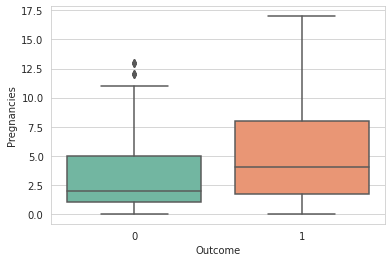

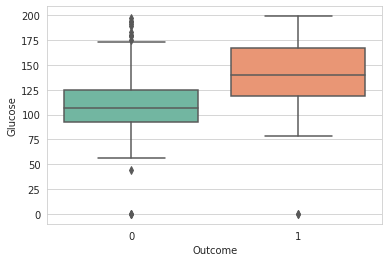

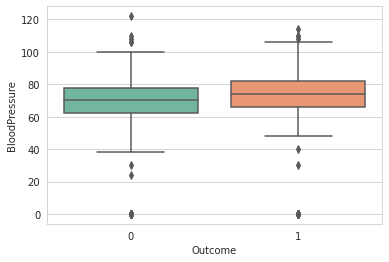

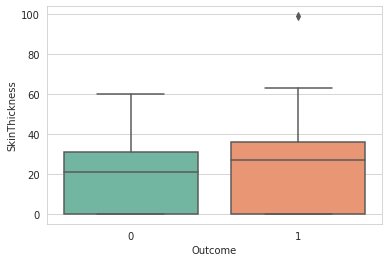

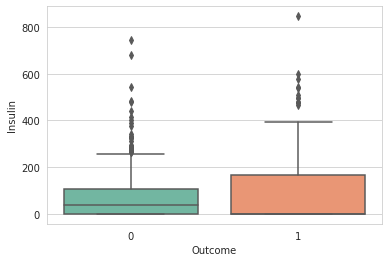

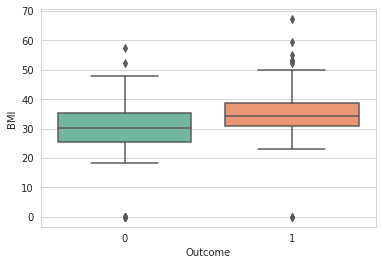

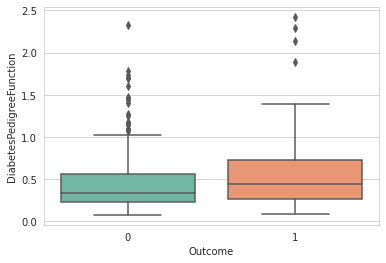

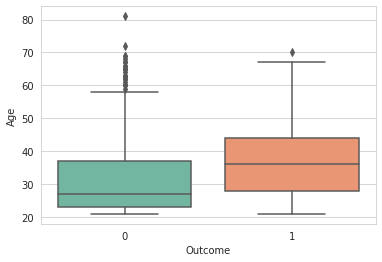

In [20]:
for i in df.columns:
    if i!='Outcome':
        sns.boxplot(x = df["Outcome"],y=df[i],palette="Set2")
        plt.show()

<AxesSubplot:>

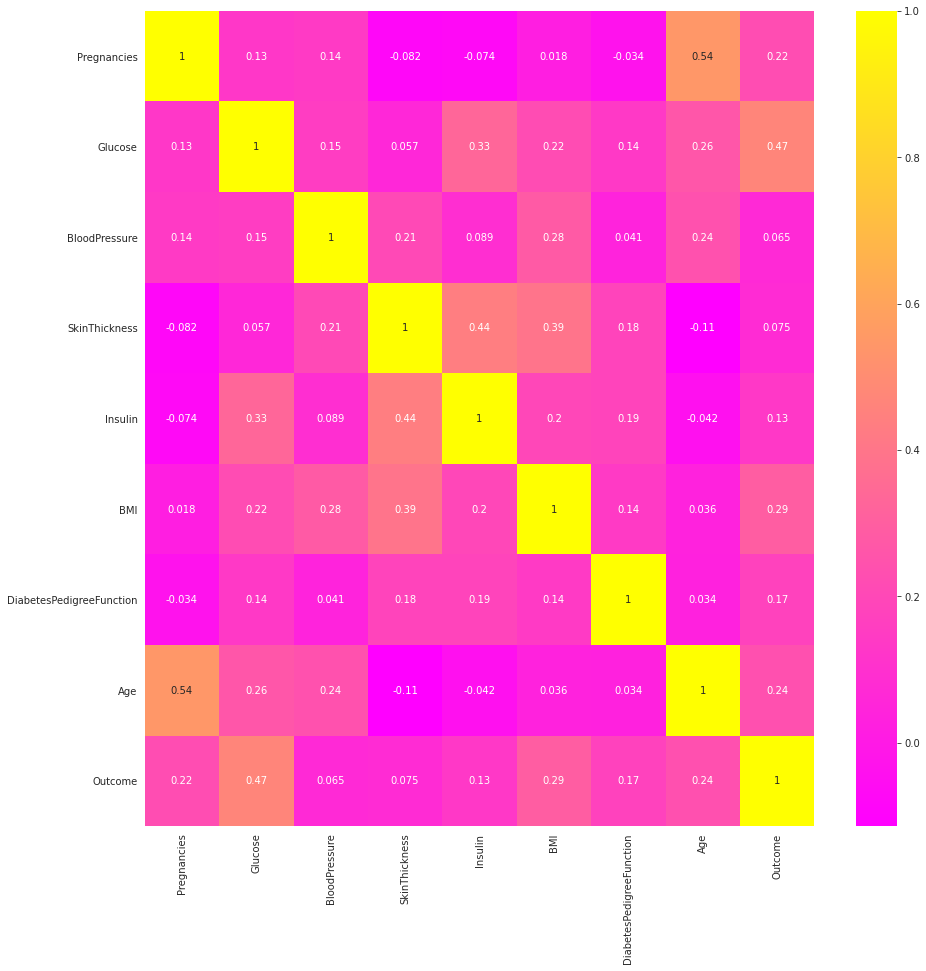

In [21]:
plt.figure(figsize=(15,15
                   ))
sns.heatmap(df.corr(),cmap="spring",annot = True)

<Figure size 1440x1440 with 0 Axes>

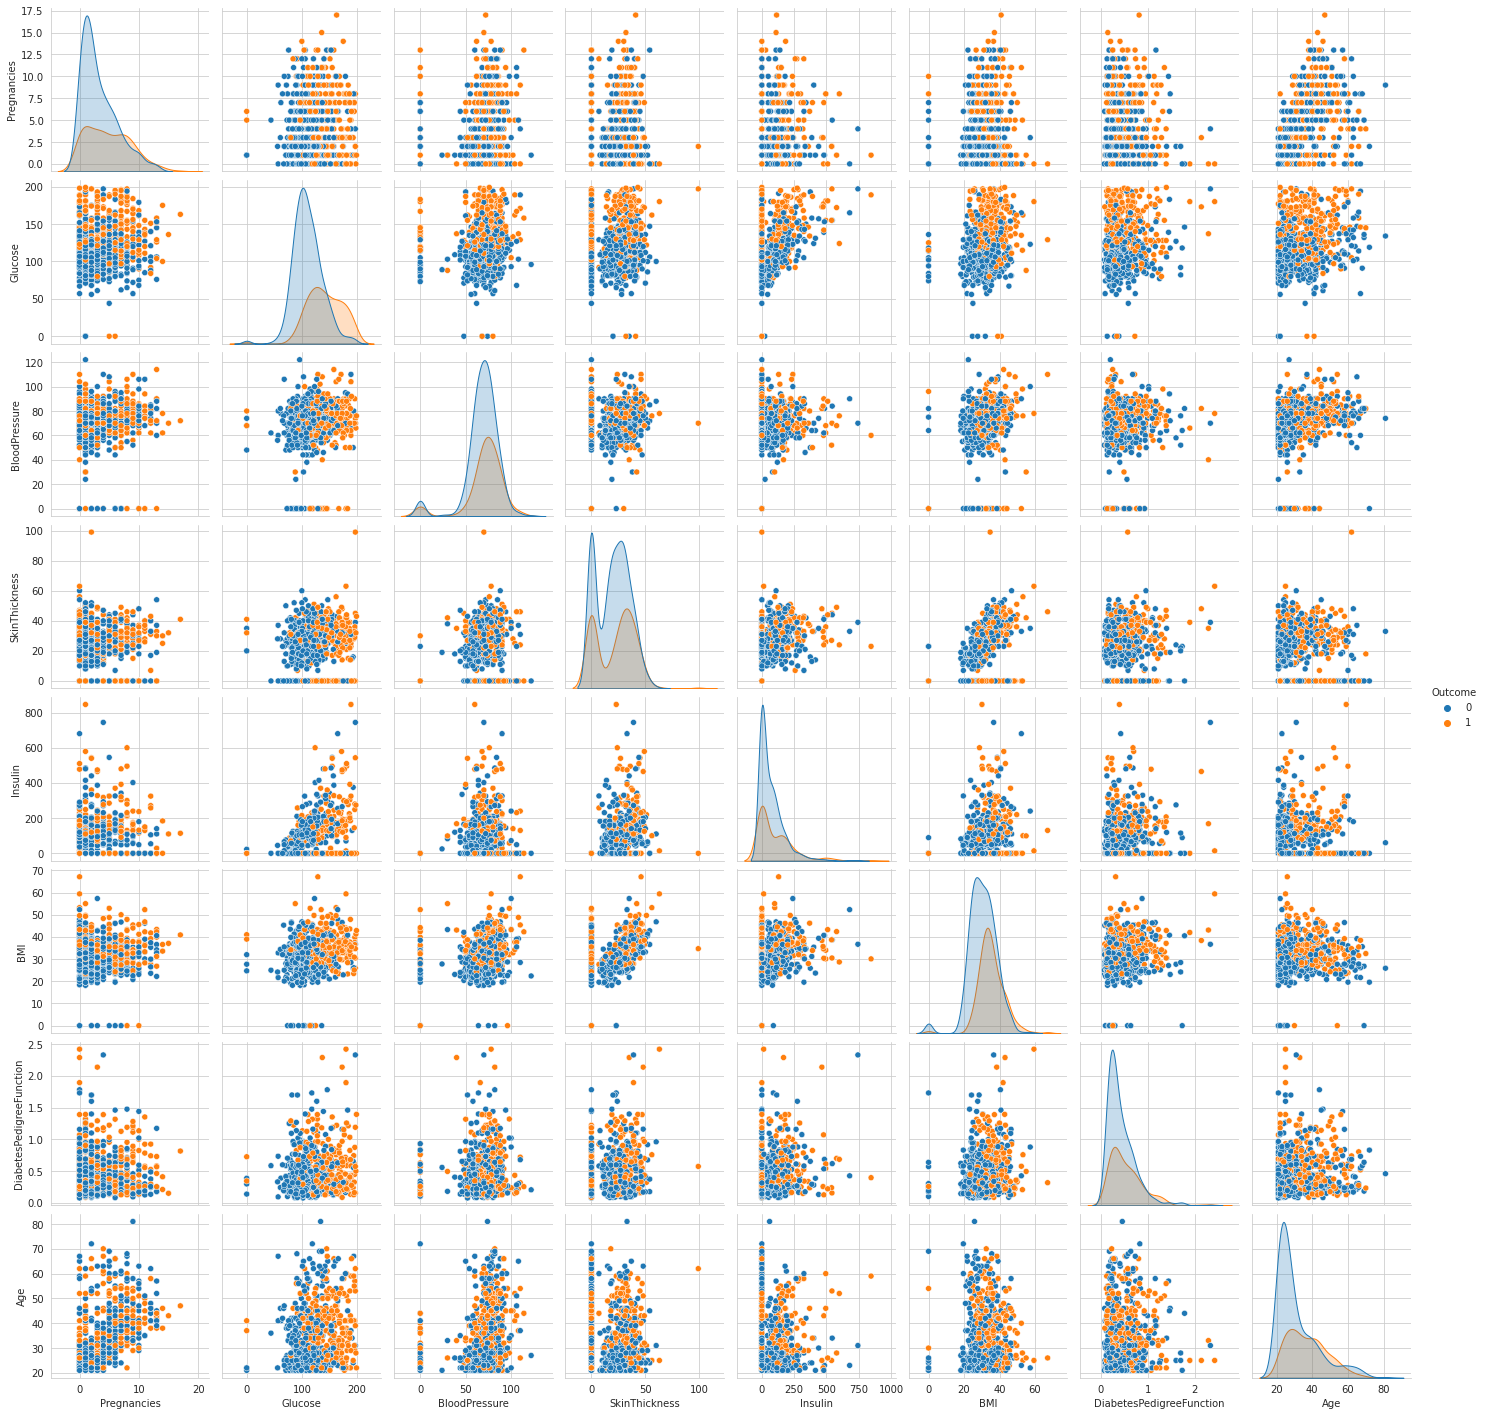

In [22]:
plt.figure(figsize=(20,20
                   ))
sns.pairplot(df,hue = "Outcome")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

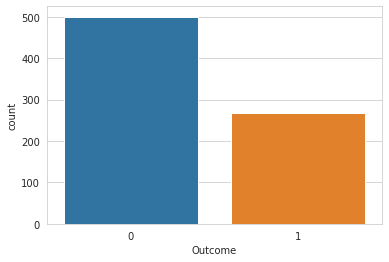

In [23]:
sns.countplot(df["Outcome"])

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [26]:
from sklearn.impute import SimpleImputer 

fill_values = SimpleImputer(missing_values=0,strategy="median")
X = fill_values.fit_transform(X)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)


In [29]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X_train,y_train = os.fit_resample(X_train, y_train.ravel())

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier(subsample=1)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

[06:09:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7239583333333334